# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0, parse_dates=True)
#data = pd.read_csv('NVDA.csv',index_col=0)
#data.index=data1.index.astype('datetime64[ns]')

stock = data['Close']

In [6]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
#Set to 2 decimal places, and display all columns (and up to 300 rows)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 300)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: xlabel='Date'>

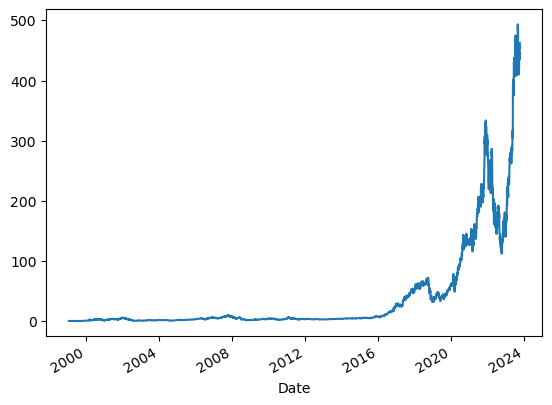

In [8]:
%pylab inline
stock.plot()

In [9]:
stock.head()
stock.tail()

Date
1999-01-22   0.41
1999-01-25   0.45
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.42
Name: Close, dtype: float64

Date
2023-10-05   446.88
2023-10-06   457.62
2023-10-09   452.73
2023-10-10   457.98
2023-10-11   462.48
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this sotck close at more than 130 dollars? (pick the closest date in Camino)

In [22]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800
1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000
1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000
1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800
1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000


In [35]:
data = data.reset_index()

In [36]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [37]:
filtered_data = data[data['Close'] > 130]
filtered_data

,Date,Open,High,Low,Close,Adj Close,Volume
5436,2020-08-28,126.75,131.48,126.43,131.48,131.12,53716000
5437,2020-08-31,131.83,135.75,130.38,133.74,133.38,50084000
5438,2020-09-01,134.80,139.94,134.37,138.21,137.87,51131600
5439,2020-09-02,147.04,147.27,139.00,143.46,143.11,87401200
5440,2020-09-03,138.29,138.85,128.79,130.15,129.84,94512800
...,...,...,...,...,...,...,...
6216,2023-10-05,440.50,449.00,438.88,446.88,446.88,39348300
6217,2023-10-06,441.93,457.89,440.26,457.62,457.62,43339700
6218,2023-10-09,448.42,456.05,443.68,452.73,452.73,40967500
6219,2023-10-10,453.10,462.59,450.88,457.98,457.98,36782600


In [38]:
first_date = filtered_data['Date'].iloc[0]

In [39]:
first_date

Timestamp('2020-08-28 00:00:00')

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [40]:
first_130_date = data[data['Close'] > 130].index[0]
first_130_date

5436

In [41]:
sliced_data = data[data.index >= first_130_date]
sliced_data

,Date,Open,High,Low,Close,Adj Close,Volume
5436,2020-08-28,126.75,131.48,126.43,131.48,131.12,53716000
5437,2020-08-31,131.83,135.75,130.38,133.74,133.38,50084000
5438,2020-09-01,134.80,139.94,134.37,138.21,137.87,51131600
5439,2020-09-02,147.04,147.27,139.00,143.46,143.11,87401200
5440,2020-09-03,138.29,138.85,128.79,130.15,129.84,94512800
...,...,...,...,...,...,...,...
6216,2023-10-05,440.50,449.00,438.88,446.88,446.88,39348300
6217,2023-10-06,441.93,457.89,440.26,457.62,457.62,43339700
6218,2023-10-09,448.42,456.05,443.68,452.73,452.73,40967500
6219,2023-10-10,453.10,462.59,450.88,457.98,457.98,36782600


In [42]:
max_close_date = sliced_data['Close'].idxmax()
max_close_date

6192

In [43]:
days_to_max = max_close_date - first_130_date
days_to_max

756

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % gain. (pick the date closest to the day with the largest gain ratio in Camino)

In [67]:
data['Percent_Gain'] = (data['Close'] - data['Close'].shift(1)) / data['Close'].shift(1) * 100
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain
0,1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800,NaN
1,1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000,10.48
2,1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000,-7.76
3,1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800,-0.31
4,1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000,-0.31


In [70]:
top_5_gains = data.nlargest(5, 'Percent_Gain')
top_5_gains

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain
283,2000-03-07,1.56,1.82,1.49,1.74,1.59,195220800,42.41
1079,2003-05-09,1.57,1.79,1.52,1.78,1.63,923085600,33.06
492,2001-01-03,1.21,1.64,1.18,1.63,1.50,91036800,30.69
4482,2016-11-11,19.88,22.19,19.62,21.99,21.65,217534400,29.81
287,2000-03-13,2.23,3.12,2.21,3.11,2.85,241516800,26.48


In [71]:
print(top_5_gains[['Date', 'Percent_Gain']])

           Date  Percent_Gain
283  2000-03-07         42.41
1079 2003-05-09         33.06
492  2001-01-03         30.69
4482 2016-11-11         29.81
287  2000-03-13         26.48


## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [73]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain
0,1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800,NaN
1,1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000,10.48
2,1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000,-7.76
3,1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800,-0.31
4,1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000,-0.31


In [74]:
data['3_day_return'] = data['Close'].shift(-2) - data['Close']

In [95]:
worst_trade_date = data['3_day_return']
worst_trade_date

0       0.01
1      -0.04
2      -0.00
3      -0.02
4      -0.01
        ... 
6216    5.85
6217    0.36
6218    9.74
6219     NaN
6220     NaN
Name: 3_day_return, Length: 6221, dtype: float64

In [96]:
worst_trade_date = data['3_day_return'].idxmin()
data.loc[worst_trade_date, ['Date', '3_day_return']]

Date            2022-04-04 00:00:00
3_day_return                 -29.53
Name: 5838, dtype: object

In [100]:
selling_date = data.index[data.index.get_loc(worst_trade_date) + 2]
data.loc[selling_date, ['Date']]

Date    2022-04-06 00:00:00
Name: 5840, dtype: object

## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [45]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800
1,1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000
2,1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000
3,1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800
4,1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000


In [46]:
data['rolling_min'] = data['Close'].rolling(window=10).min()

In [47]:
data['gain'] = ((data['Close'] - data['rolling_min']) / data['rolling_min']) * 100

In [48]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rolling_min,gain
0,1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800,NaN,NaN
1,1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000,NaN,NaN
2,1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000,NaN,NaN
3,1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800,NaN,NaN
4,1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000,NaN,NaN


In [153]:
result = data[data['gain'] > 60][['Date', 'gain']]
result.sort_values(by='gain', ascending=False)

,Date,gain
287,2000-03-13,157.61
286,2000-03-10,103.67
288,2000-03-14,90.08
289,2000-03-15,82.31
272,2000-02-18,77.01
285,2000-03-09,73.11
291,2000-03-17,70.73
684,2001-10-12,69.30
685,2001-10-15,68.55
273,2000-02-22,64.26


## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [138]:
data_reversed = data.iloc[::-1]
data_reversed.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain,3_day_return,gain,rolling_min
6220,2023-10-11,461.96,467.20,461.10,462.48,462.48,22348311,0.98,NaN,7.33,430.89
6219,2023-10-10,453.10,462.59,450.88,457.98,457.98,36782600,1.16,NaN,7.84,424.68
6218,2023-10-09,448.42,456.05,443.68,452.73,452.73,40967500,-1.07,9.74,8.02,419.11
6217,2023-10-06,441.93,457.89,440.26,457.62,457.62,43339700,2.40,0.36,9.19,419.11
6216,2023-10-05,440.50,449.00,438.88,446.88,446.88,39348300,1.47,5.85,7.40,416.10


In [139]:
data_reversed['cummin'] = data_reversed['Close'].cummin()
data_reversed.head()

/var/folders/x6/29gj9fhd1rs_98l6pyr3bngw0000gn/T/ipykernel_37794/742253882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reversed['cummin'] = data_reversed['Close'].cummin()


,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain,3_day_return,gain,rolling_min,cummin
6220,2023-10-11,461.96,467.20,461.10,462.48,462.48,22348311,0.98,NaN,7.33,430.89,462.48
6219,2023-10-10,453.10,462.59,450.88,457.98,457.98,36782600,1.16,NaN,7.84,424.68,457.98
6218,2023-10-09,448.42,456.05,443.68,452.73,452.73,40967500,-1.07,9.74,8.02,419.11,452.73
6217,2023-10-06,441.93,457.89,440.26,457.62,457.62,43339700,2.40,0.36,9.19,419.11,452.73
6216,2023-10-05,440.50,449.00,438.88,446.88,446.88,39348300,1.47,5.85,7.40,416.10,446.88


In [142]:
data_reversed.loc[:, 'abs_loss'] = data_reversed['Close'] - data_reversed['cummin']
data_reversed.loc[:, 'pct_loss'] = (data_reversed['abs_loss'] / data_reversed['Close']) * 100

/var/folders/x6/29gj9fhd1rs_98l6pyr3bngw0000gn/T/ipykernel_37794/2391390766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reversed.loc[:, 'abs_loss'] = data_reversed['Close'] - data_reversed['cummin']
/var/folders/x6/29gj9fhd1rs_98l6pyr3bngw0000gn/T/ipykernel_37794/2391390766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reversed.loc[:, 'pct_loss'] = (data_reversed['abs_loss'] / data_reversed['Close']) * 100


In [143]:
data_reversed.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Percent_Gain,3_day_return,gain,rolling_min,cummin,abs_loss,pct_loss
6220,2023-10-11,461.96,467.20,461.10,462.48,462.48,22348311,0.98,NaN,7.33,430.89,462.48,0.00,0.00
6219,2023-10-10,453.10,462.59,450.88,457.98,457.98,36782600,1.16,NaN,7.84,424.68,457.98,0.00,0.00
6218,2023-10-09,448.42,456.05,443.68,452.73,452.73,40967500,-1.07,9.74,8.02,419.11,452.73,0.00,0.00
6217,2023-10-06,441.93,457.89,440.26,457.62,457.62,43339700,2.40,0.36,9.19,419.11,452.73,4.89,1.07
6216,2023-10-05,440.50,449.00,438.88,446.88,446.88,39348300,1.47,5.85,7.40,416.10,446.88,0.00,0.00


In [144]:
max_loss_row = data_reversed.loc[data_reversed['pct_loss'].idxmax()]

In [147]:
sell_date = data.loc[data['Close'] == max_loss_row['cummin'], 'Date'].iloc[0]
buy_date = max_loss_row['Date']
sell_date
buy_date
max_loss_row

Timestamp('2002-10-09 00:00:00')

Timestamp('2002-01-03 00:00:00')

Date            2002-01-03 00:00:00
Open                           5.62
High                           6.00
Low                            5.62
Close                          5.98
Adj Close                      5.48
Volume                    141475200
Percent_Gain                   6.55
3_day_return                  -0.33
gain                          15.85
rolling_min                    5.16
cummin                         0.61
abs_loss                       5.36
pct_loss                      89.72
Name: 740, dtype: object

In [151]:
print(f"Sell on {sell_date} and buy on {buy_date} for a maximum loss of {max_loss_row['pct_loss']:.2f}%.")

Sell on 2002-10-09 00:00:00 and buy on 2002-01-03 00:00:00 for a maximum loss of 89.72%.
